In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, adjusted_mutual_info_score

In [2]:
df = pd.read_csv("D:\\machine learning practice\\customer Retail\\Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


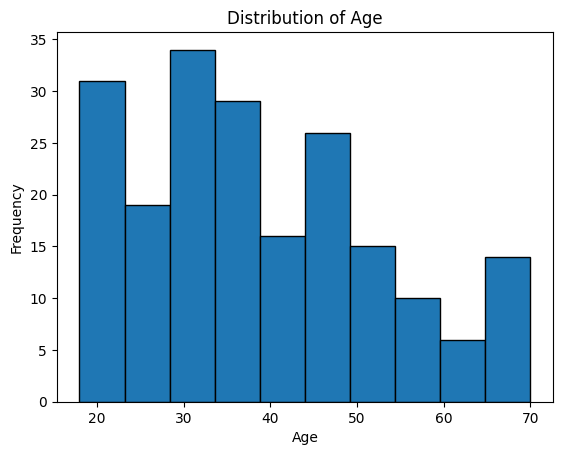

In [17]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Age' is the column for which you want to plot the histogram
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

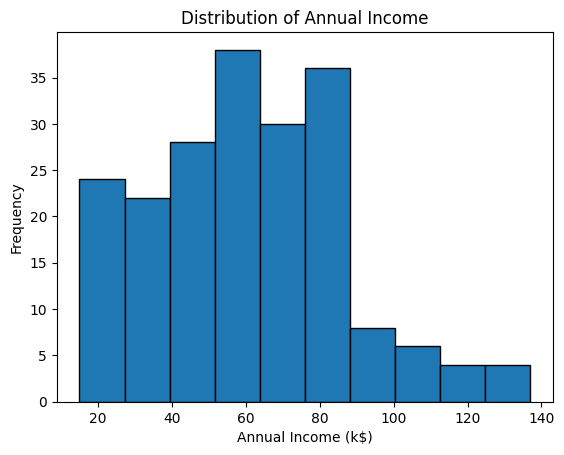

In [18]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Annual Income (k$)' is the column for which you want to plot the histogram
plt.hist(df['Annual Income (k$)'], bins=10, edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

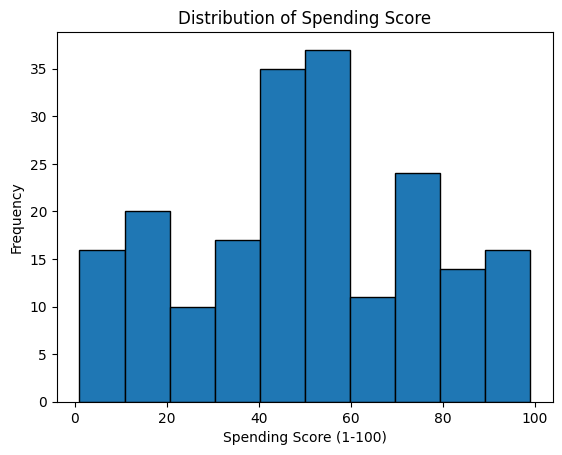

In [19]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Spending Score (1-100)' is the column for which you want to plot the histogram
plt.hist(df['Spending Score (1-100)'], bins=10, edgecolor='black')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

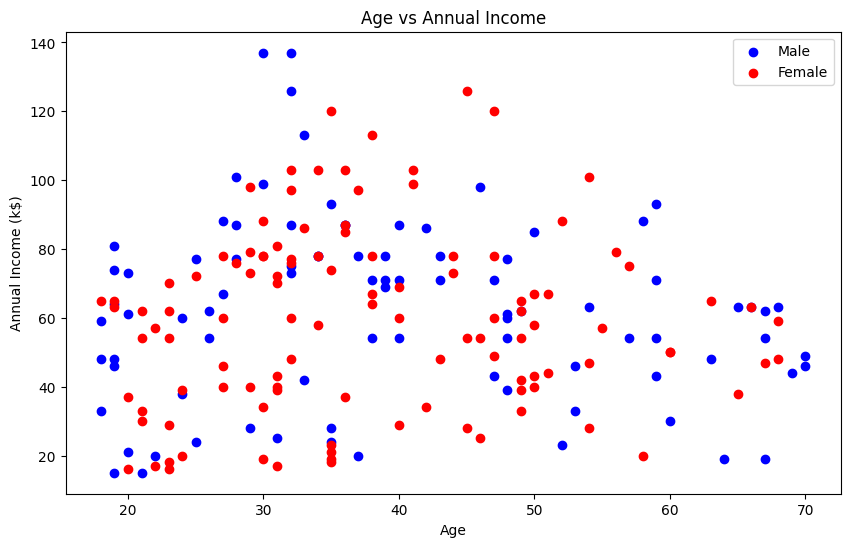

In [20]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Separate the data by Gender for color differentiation
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(male_df['Age'], male_df['Annual Income (k$)'], color='blue', label='Male')
plt.scatter(female_df['Age'], female_df['Annual Income (k$)'], color='red', label='Female')

# Customization
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()

# Display the plot
plt.show()

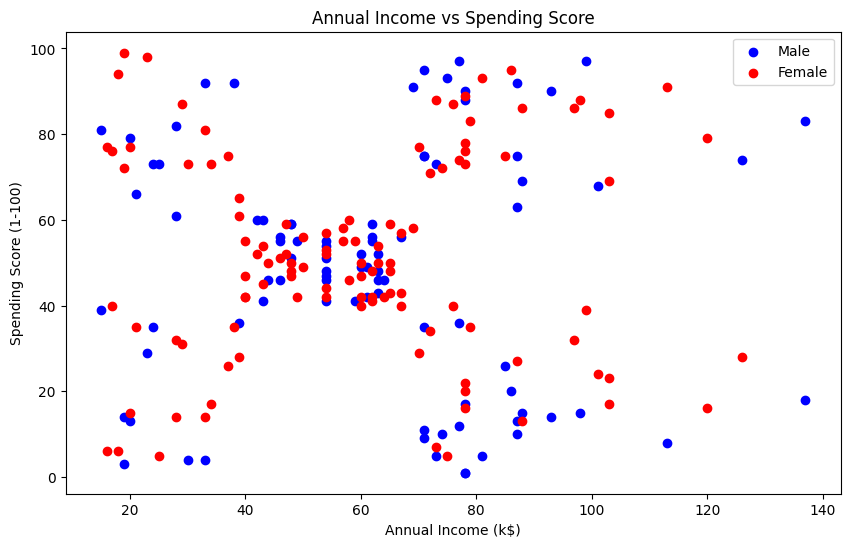

In [21]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Separate the data by Gender for color differentiation
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(male_df['Annual Income (k$)'], male_df['Spending Score (1-100)'], color='blue', label='Male')
plt.scatter(female_df['Annual Income (k$)'], female_df['Spending Score (1-100)'], color='red', label='Female')

# Customization
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Display the plot
plt.show()

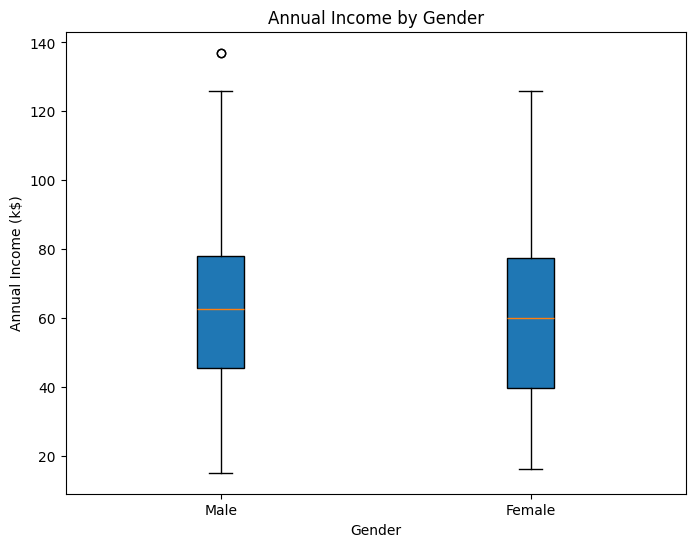

In [22]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Prepare data: separate 'Annual Income (k$)' by 'Gender'
data_to_plot = [df[df['Gender'] == 'Male']['Annual Income (k$)'], df[df['Gender'] == 'Female']['Annual Income (k$)']]

# Plotting
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, labels=['Male', 'Female'], patch_artist=True, showfliers=True)

# Customization
plt.title('Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')

# Display the plot
plt.show()

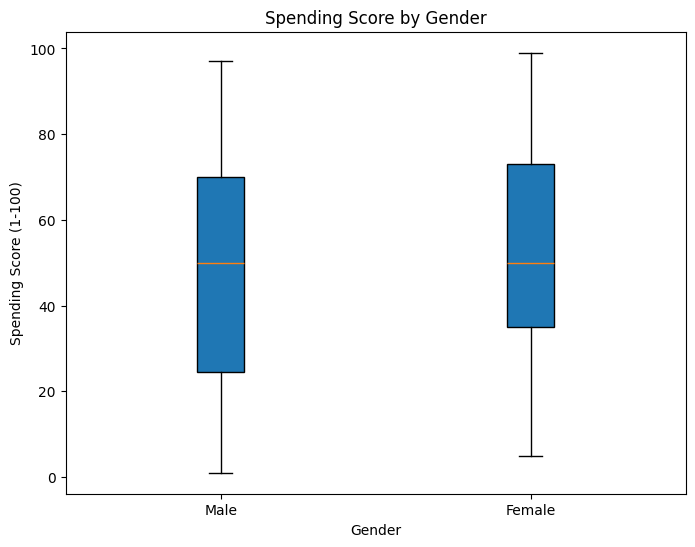

In [23]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Prepare data: separate 'Spending Score (1-100)' by 'Gender'
data_to_plot = [df[df['Gender'] == 'Male']['Spending Score (1-100)'], df[df['Gender'] == 'Female']['Spending Score (1-100)']]

# Plotting
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, labels=['Male', 'Female'], patch_artist=True, showfliers=True)

# Customization
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')

# Display the plot
plt.show()

In [24]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

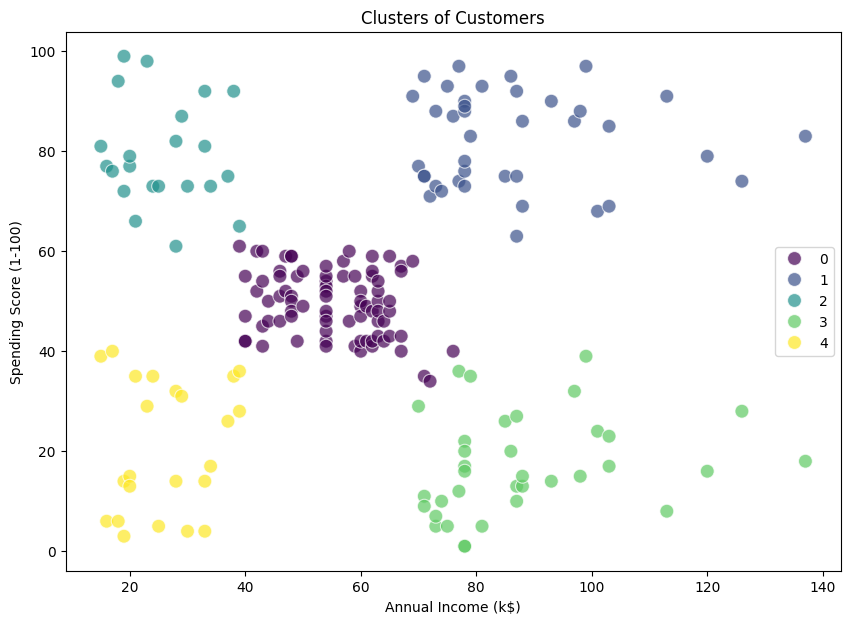

In [27]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster'] = y_kmeans
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()